In [1]:
pip install pandas matplotlib seaborn

In [2]:
import pandas as pd

# Loading the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Displaying the first few rows of each DataFrame
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
# 2. Summary statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


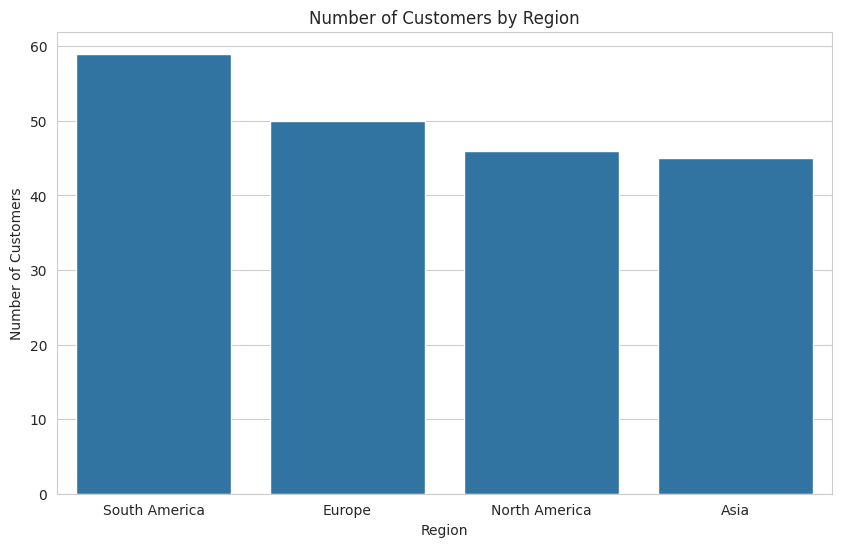

In [5]:
# 3. Distribution of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

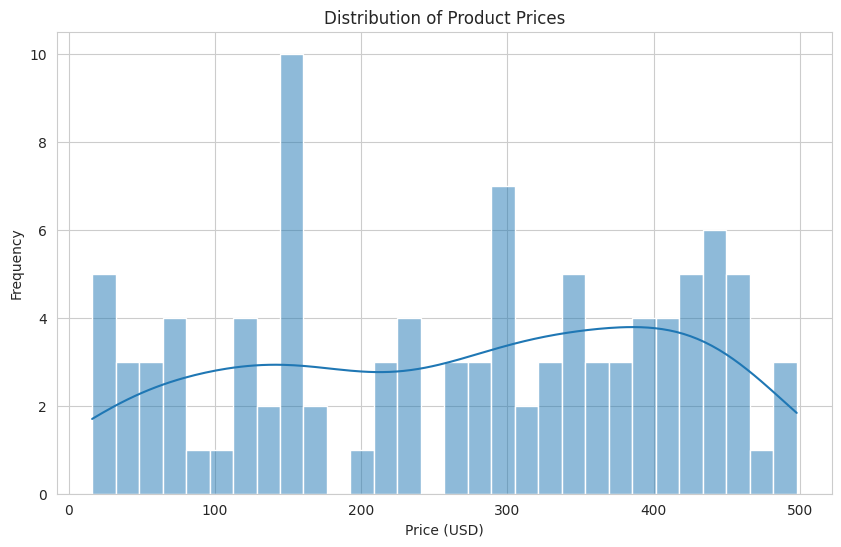

In [6]:
# 4. Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

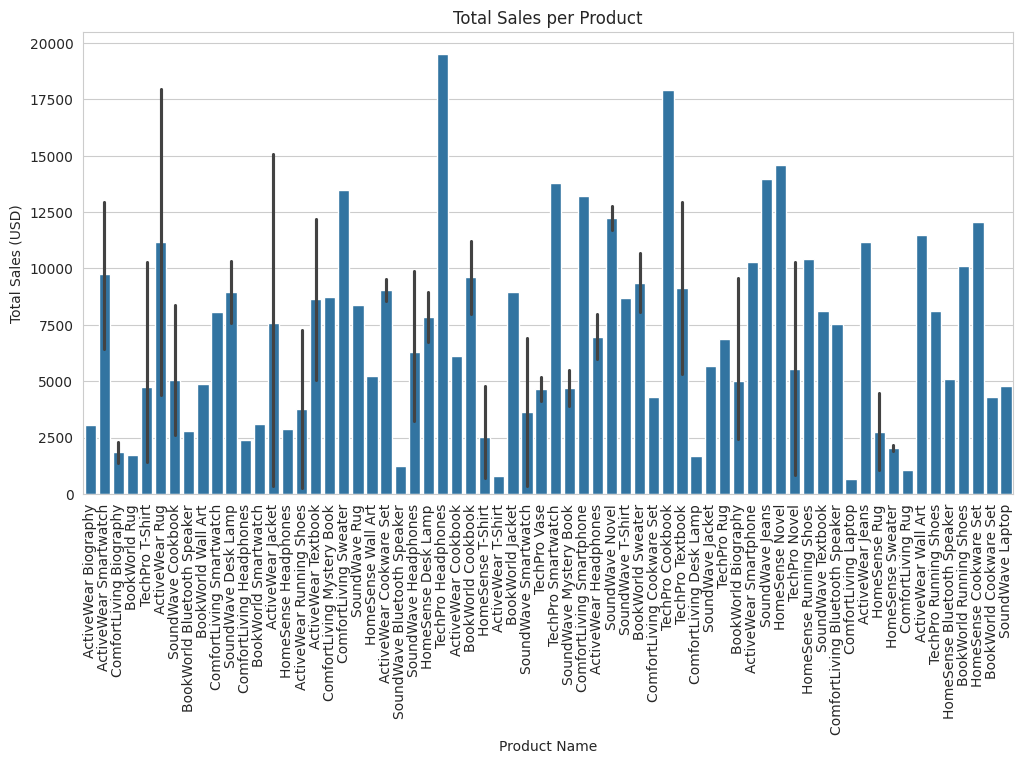

In [7]:
# 5. Total sales per product
total_sales_per_product = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
merged_sales = total_sales_per_product.merge(products, on='ProductID')
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_sales, x='ProductName', y='TotalValue')
plt.title('Total Sales per Product')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Total Sales (USD)')
plt.show()

NaN values in TotalValue: 0
        Month  TotalValue
0  2023-12-01     3769.52
1  2024-01-01    66376.39
2  2024-02-01    51459.27
3  2024-03-01    47828.73
4  2024-04-01    57519.06
5  2024-05-01    64527.74
6  2024-06-01    48771.18
7  2024-07-01    71366.39
8  2024-08-01    63436.74
9  2024-09-01    70603.75
10 2024-10-01    47063.22
11 2024-11-01    38224.37
12 2024-12-01    59049.20


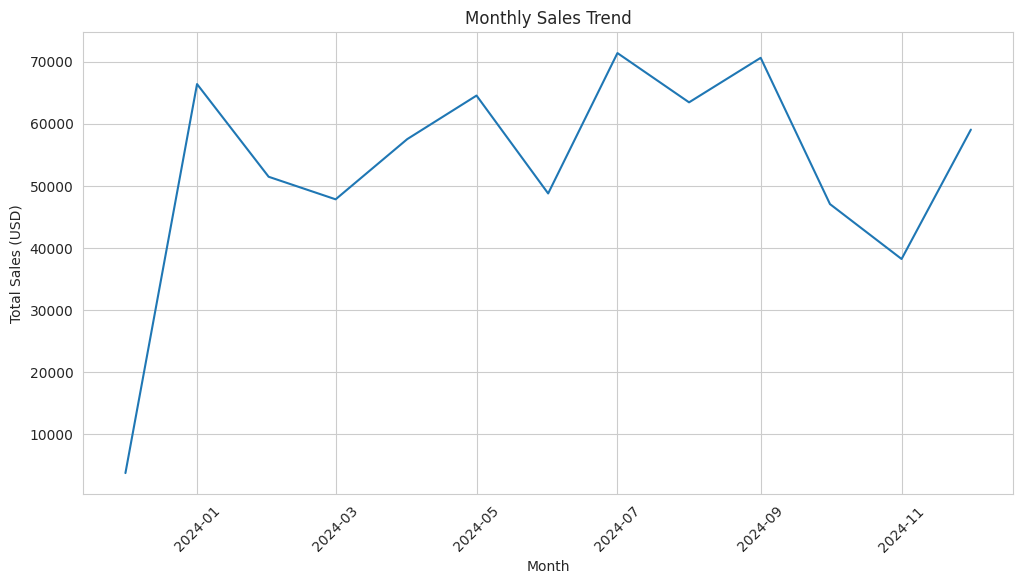

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the transactions dataset
transactions = pd.read_csv('Transactions.csv')

# Ensure TransactionDate is in datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for NaN values in TotalValue
print("NaN values in TotalValue:", transactions['TotalValue'].isnull().sum())

# If there are NaN values, drop them
transactions = transactions.dropna(subset=['TotalValue'])

# Extract month from TransactionDate
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

# Group by month and sum TotalValue
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

# Convert Month back to a datetime format for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Check the monthly_sales DataFrame
print(monthly_sales)

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

  ProductID  TotalValue              ProductName     Category   Price
0      P001     3047.40     ActiveWear Biography        Books  169.30
1      P002     8657.50    ActiveWear Smartwatch  Electronics  346.30
2      P003     1367.72  ComfortLiving Biography        Books   44.12
3      P004     1722.42            BookWorld Rug   Home Decor   95.69
4      P005    10303.44          TechPro T-Shirt     Clothing  429.31
Correlation between Price and Total Sales: 0.84


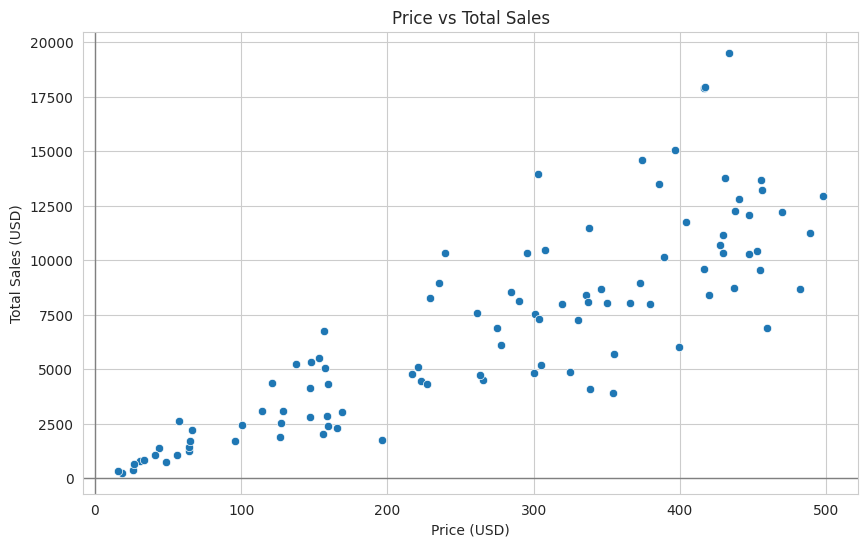

In [13]:
# Ensure TransactionDate is in datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Calculate total sales per product
total_sales_per_product = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()

# Merge total sales with product information
merged_sales = total_sales_per_product.merge(products, on='ProductID')

# Check the first few rows of the merged DataFrame
print(merged_sales.head())

# Price Sensitivity Analysis
# Calculate the correlation between Price and Total Sales
correlation = merged_sales['Price'].corr(merged_sales['TotalValue'])
print(f"Correlation between Price and Total Sales: {correlation:.2f}")

# Visualization: Scatter plot of Price vs Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_sales, x='Price', y='TotalValue')
plt.title('Price vs Total Sales')
plt.xlabel('Price (USD)')
plt.ylabel('Total Sales (USD)')
plt.axhline(0, color='gray', lw=1)  # Add a horizontal line at y=0
plt.axvline(0, color='gray', lw=1)  # Add a vertical line at x=0
plt.grid(True)
plt.show()